Importing the module that we are used

In [6]:
import random
import numpy as np

Open the data set

In [3]:
# Load the data set
def load_dataset():

    # open the data set
    file = open("seeds_dataset.txt")
    lines = file.readlines()
    data_set = []
    
    for line in lines:
        x = []
        line = line.strip().split()
        for elem in line:
            x.append(float(elem))
        data_set.append(x)
    
    return data_set

data_set = load_dataset()

In [4]:
print(data_set)

[[15.26, 14.84, 0.871, 5.763, 3.312, 2.221, 5.22, 1.0], [14.88, 14.57, 0.8811, 5.554, 3.333, 1.018, 4.956, 1.0], [14.29, 14.09, 0.905, 5.291, 3.337, 2.699, 4.825, 1.0], [13.84, 13.94, 0.8955, 5.324, 3.379, 2.259, 4.805, 1.0], [16.14, 14.99, 0.9034, 5.658, 3.562, 1.355, 5.175, 1.0], [14.38, 14.21, 0.8951, 5.386, 3.312, 2.462, 4.956, 1.0], [14.69, 14.49, 0.8799, 5.563, 3.259, 3.586, 5.219, 1.0], [14.11, 14.1, 0.8911, 5.42, 3.302, 2.7, 5.0, 1.0], [16.63, 15.46, 0.8747, 6.053, 3.465, 2.04, 5.877, 1.0], [16.44, 15.25, 0.888, 5.884, 3.505, 1.969, 5.533, 1.0], [15.26, 14.85, 0.8696, 5.714, 3.242, 4.543, 5.314, 1.0], [14.03, 14.16, 0.8796, 5.438, 3.201, 1.717, 5.001, 1.0], [13.89, 14.02, 0.888, 5.439, 3.199, 3.986, 4.738, 1.0], [13.78, 14.06, 0.8759, 5.479, 3.156, 3.136, 4.872, 1.0], [13.74, 14.05, 0.8744, 5.482, 3.114, 2.932, 4.825, 1.0], [14.59, 14.28, 0.8993, 5.351, 3.333, 4.185, 4.781, 1.0], [13.99, 13.83, 0.9183, 5.119, 3.383, 5.234, 4.781, 1.0], [15.69, 14.75, 0.9058, 5.527, 3.514, 1.599

In [7]:
data_set = np.array(data_set)
X = data_set[:, :-1]
y = data_set[:, -1]

In [8]:
# For making compatibility we do one hot encoding
def oneHotEncoding(y):
    if y == 1:
        return [1, 0, 0]
    elif y == 2:
        return [0, 1, 0]
    else :
        return [0, 0, 1]

In [9]:
# print(y)
def split_data(X, y, split_ratio = 0.8):
 
    indexes = [i for i in range(len(X))]
    train_size = len(indexes) * split_ratio
    train_index = np.random.choice(indexes, size=int(train_size), replace=False)
    
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    
    for i in range(len(X)):

        if i in train_index:
            X_train.append(X[i])
            y_train.append(oneHotEncoding(y[i]))
        
        else:
            X_test.append(X[i])
            y_test.append(oneHotEncoding(y[i]))
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X, y)

In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

Nerual Network class

In [11]:
class NeuralNetwork:

    # Constructor
    def __init__(self,
                 no_of_hidden_layer = 0,                # number of hidden layer
                 input_size = 0,                        # input size of neural network  
                 output_size = 0,                       # output size of neural network
                 hidden1_size = 0,                      # hidden layer 1 size of neural network
                 hidden2_size = 0                       # hidden layer 2 size of neural network
                 ) :
        
        # Initialize the variables
        self.no_of_hidden_layer = no_of_hidden_layer
        self.input_size = input_size
        self.output_size = output_size
        self.hidden1_size = hidden1_size
        self.hidden2_size = hidden2_size

        # Initialize weights for ANN Specification 1
        if self.no_of_hidden_layer == 1:
            # Initialize weight and bias between input and hidden layer
            self.weight_I_H1 = self.Initialize_Weights(self.input_size, self.hidden1_size)
            self.bias_1 = np.zeros((1, self.hidden1_size))

            # Initialize weight and bias between hidden layer and output layer
            self.weights_H1_O = self.Initialize_Weights(self.hidden1_size, self.output_size)
            self.bias_2 = np.zeros((1, self.output_size))
        
        else:
            # Initialize weight and bias between input and hidden layer 1
            self.weight_I_H1 = self.Initialize_Weights(self.input_size, self.hidden1_size)
            self.bias_1 = np.zeros((1, self.hidden1_size))

            # Initialize weight and bias between hidden layer 1 and hidden layer 2
            self.weights_H1_H2 = self.Initialize_Weights(self.hidden1_size, self.hidden2_size)
            self.bias_2 = np.zeros((1, self.hidden2_size))  

            # Initialize weight and bias between hidden layer 2 and output layer 
            self.weights_H2_O = self.Initialize_Weights(self.hidden2_size, self.output_size)
            self.bias_3 = np.zeros((1, self.output_size))         
    
    def Info(self):
        print(f"number of hidden layer : {self.no_of_hidden_layer}")
        print(f"input size of neural network : {self.input_size}")
        print(f"output size of neural network : {self.output_size}")
        print(f"hidden layer 1 size of neural network : {self.hidden1_size}")
        print(f"hidden layer 2 size of neural network : {self.hidden2_size}")

    # Function that initializes weights between -1 and 1 
    def Initialize_Weights(self, size1, size2):
        return np.random.uniform(low=-1, high=1, size=(size1, size2))
    

    # Sigmoid activation function
    def sigmoid(self, y):
        return 1 / (1 + np.exp(-y))
    
    # Soft max activation function
    def softmax(self, y):
        exp_y = np.exp(y)
        return exp_y / np.sum(exp_y, axis=1, keepdims=True)
    
    # Relu activation function
    def relu(self, y):
        return np.maximum(0, y)
    
    def relu_der(self, y):
        y[y <= 0] = 0
        y[y > 0] = 1

        return y

    # Now do forward pass of activation function
    def forward(self, X):

        # For ANN Specification 1 
        if self.no_of_hidden_layer == 1:

            # Hidden layer
            self.z1 = np.dot(X, self.weight_I_H1) + self.bias_1
            self.a1 = self.sigmoid(self.z1)

            # Output layer
            self.z2 = np.dot(self.a1, self.weights_H1_O) + self.bias_2
            self.a2 = self.softmax(self.z2)

            return self.a2  

        else:

            # Hidden layer 1
            self.z1 = np.dot(X, self.weight_I_H1) + self.bias_1
            self.a1 = self.relu(self.z1)
            
            # Hidden layer 2
            self.z2 = np.dot(self.a1, self.weights_H1_H2) + self.bias_2
            self.a2 = self.relu(self.z2)

            # output layer
            self.z3 = np.dot(self.a2, self.weights_H2_O) + self.bias_3
            self.a3 = self.softmax(self.z3)

            return self.a3
    
    # Cross Entropy loss function
    def cross_entropy_loss(self, y_true, y_pred):
        num_samples = y_true.shape[0]
        loss = -np.sum(y_true * np.log(y_pred)) / num_samples
        # print(loss)
        return loss

    def backward(self, X, y, y_hat, learning_rate = 0.01):
        
        # For ANN Specification 1 
        if self.no_of_hidden_layer == 1:
            # Compute gradients

            m = y.shape[0]
            delta2 = y_hat - y
            dW2 = np.dot(self.a1.T, delta2) / m
            db2 = np.sum(delta2, axis=0, keepdims=True) / m

            delta1 = np.dot(delta2, self.weights_H1_O.T) * self.a1 * (1 - self.a1)
            dW1 = np.dot(X.T, delta1) / m
            db1 = np.sum(delta1, axis=0, keepdims=True) / m
            
            # Now update the weights
            self.weights_H1_O -= learning_rate * dW2
            self.bias_2 -= learning_rate * db2
            self.weight_I_H1 -= learning_rate * dW1
            self.bias_1 -= learning_rate * db1
        
        else:

            # compute graients

            m = y.shape[0]
            delta3 = y_hat - y
            dW3 = np.dot(self.a2.T, delta3) / m
            db3 = np.sum(delta3, axis=0, keepdims=True) / m

            delta2 = (np.dot(delta3, self.weights_H2_O.T) * (self.a2 > 0)) / m
            dW2 = np.dot(self.a1.T, delta2)
            db2 = np.sum(delta2, axis=0, keepdims=True)

            delta1 = (np.dot(delta2, self.weights_H1_H2.T) * (self.a1 > 0)) / m
            dW1 = np.dot(X.T, delta1)
            db1 = np.sum(delta1, axis=0, keepdims=True)

            # Now update the weights
            self.weight_I_H1 -= learning_rate * dW1
            self.bias_1 -= learning_rate * db1
            self.weights_H1_H2 -= learning_rate * dW2
            self.bias_2 -= learning_rate * db2
            self.weights_H2_O -= learning_rate * dW3
            self.bias_3 -= learning_rate * db3

    
    def train(self, X_train, y_train, X_test, y_test, epochs = 200, batch_size = 32):

        # Calulate the number of batches
        num_batch = X_train.shape[0] // batch_size
        train_acc = []
        test_acc = []
        for i in range(epochs):
            # Shuffle training data
            perm = np.random.permutation(X_train.shape[0])
            X_train = X_train[perm]
            y_train = y_train[perm]
            
            # Train on mini-batches
            for j in range(num_batch):
                
                start = j * batch_size
                end = (j + 1) * batch_size

                batch_X = X_train[start : end]
                batch_y = y_train[start : end]

                # print(batch_X, batch_y)
                # Forward pass
                y_hat = self.forward(batch_X)
                # print(y_hat)
                
                # Backward pass
                self.backward(batch_X, batch_y, y_hat)
            
            # Compute the accuracy on every 10 epochs
            if i % 10 == 0:
                acc_train = self.predict(X_train, y_train)
                acc_test = self.predict(X_test, y_test)

                print(f"Epoch : {i} -> Training Accuracy : {acc_train}, Testing Accuracy : {acc_test}")
                train_acc.append(acc_train)
                test_acc.append(acc_test)
        return train_acc, test_acc

    
    # Function to calculate the accuracy
    def accuracy(self, y_pred, y):
        acc = np.mean(y_pred == np.argmax(y, axis=1))
        return acc

    # Function that predict the output 
    def predict(self, X, y):
        y_hat = self.forward(X)
        y_pred = np.argmax(y_hat, axis=1)
        acc = self.accuracy(y_pred, y)
        return acc
        

In [12]:
clf = NeuralNetwork(no_of_hidden_layer=1, input_size=7, output_size= 3, hidden1_size=32)
clf.Info()

number of hidden layer : 1
input size of neural network : 7
output size of neural network : 3
hidden layer 1 size of neural network : 32
hidden layer 2 size of neural network : 0


In [15]:
train_acc, test_acc = clf.train(X_train, y_train, X_test, y_test)

Epoch : 0 -> Training Accuracy : 0.6011904761904762, Testing Accuracy : 0.5238095238095238
Epoch : 10 -> Training Accuracy : 0.8809523809523809, Testing Accuracy : 0.8809523809523809
Epoch : 20 -> Training Accuracy : 0.8988095238095238, Testing Accuracy : 0.9047619047619048
Epoch : 30 -> Training Accuracy : 0.8928571428571429, Testing Accuracy : 0.9047619047619048
Epoch : 40 -> Training Accuracy : 0.8928571428571429, Testing Accuracy : 0.8333333333333334
Epoch : 50 -> Training Accuracy : 0.9107142857142857, Testing Accuracy : 0.9047619047619048
Epoch : 60 -> Training Accuracy : 0.8630952380952381, Testing Accuracy : 0.8095238095238095
Epoch : 70 -> Training Accuracy : 0.8690476190476191, Testing Accuracy : 0.8571428571428571
Epoch : 80 -> Training Accuracy : 0.9047619047619048, Testing Accuracy : 0.8333333333333334
Epoch : 90 -> Training Accuracy : 0.9107142857142857, Testing Accuracy : 0.8333333333333334
Epoch : 100 -> Training Accuracy : 0.7619047619047619, Testing Accuracy : 0.73809

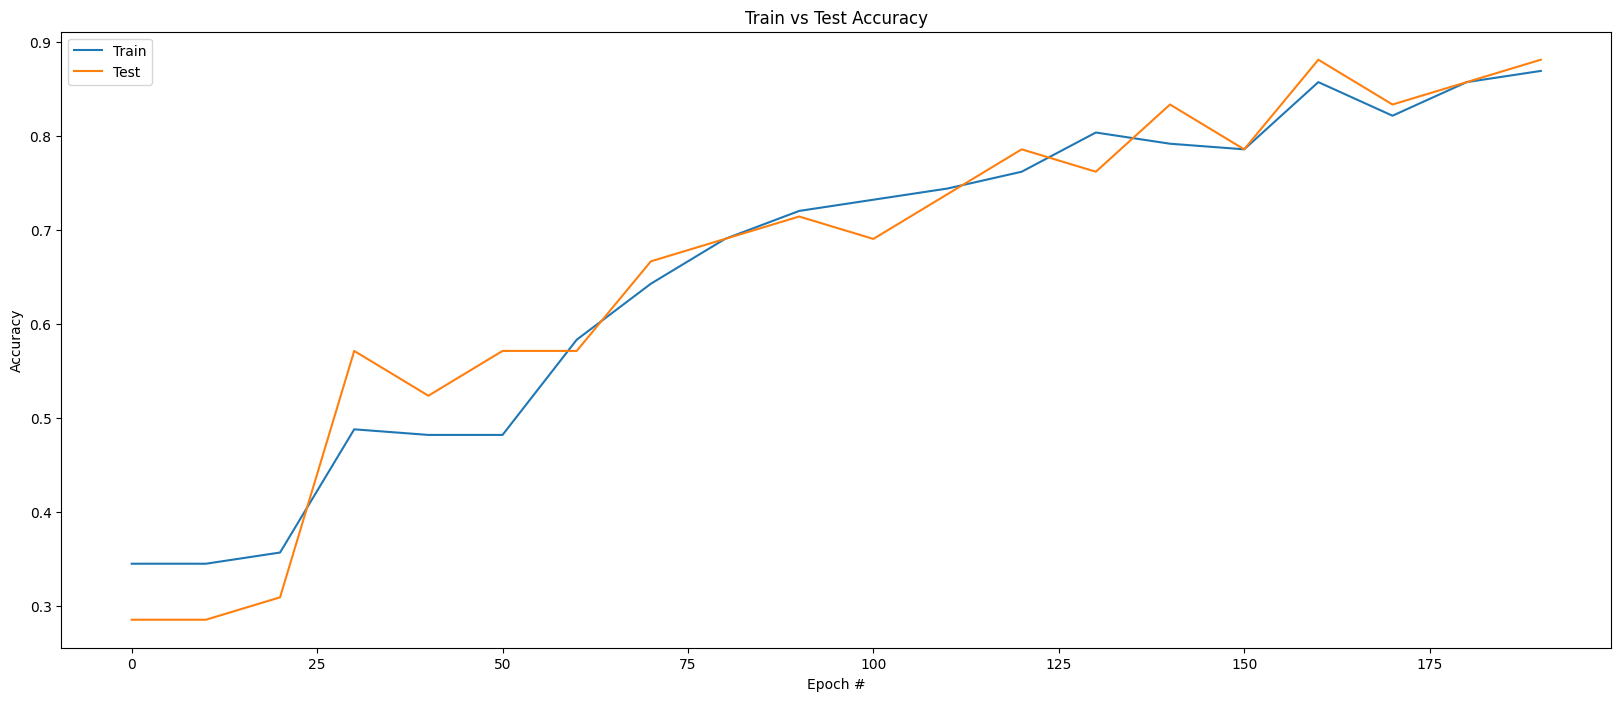

In [63]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(20,8)
plt.plot(range(0, 200, 10), train_acc)
plt.plot(range(0, 200, 10),test_acc)
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.title('Train vs Test Accuracy')
plt.show()

In [16]:
print("For ANN Specification 1")
print(f"Final Training accuracy: {clf.predict(X_train, y_train)}")
print(f"Final Testing accuracy: {clf.predict(X_test, y_test)}")

For ANN Specification 1
Final Training accuracy: 0.9523809523809523
Final Testing accuracy: 0.9047619047619048


In [17]:
clf = NeuralNetwork(no_of_hidden_layer=2, input_size=7, output_size=3, hidden1_size=64, hidden2_size=32)
clf.Info()

number of hidden layer : 2
input size of neural network : 7
output size of neural network : 3
hidden layer 1 size of neural network : 64
hidden layer 2 size of neural network : 32


In [18]:
train_acc, test_acc = clf.train(X_train, y_train, X_test, y_test)

Epoch : 0 -> Training Accuracy : 0.3392857142857143, Testing Accuracy : 0.30952380952380953
Epoch : 10 -> Training Accuracy : 0.6964285714285714, Testing Accuracy : 0.6428571428571429
Epoch : 20 -> Training Accuracy : 0.75, Testing Accuracy : 0.7142857142857143
Epoch : 30 -> Training Accuracy : 0.9047619047619048, Testing Accuracy : 0.8809523809523809
Epoch : 40 -> Training Accuracy : 0.9047619047619048, Testing Accuracy : 0.8809523809523809
Epoch : 50 -> Training Accuracy : 0.8928571428571429, Testing Accuracy : 0.8095238095238095
Epoch : 60 -> Training Accuracy : 0.9285714285714286, Testing Accuracy : 0.9047619047619048
Epoch : 70 -> Training Accuracy : 0.8571428571428571, Testing Accuracy : 0.8571428571428571
Epoch : 80 -> Training Accuracy : 0.9107142857142857, Testing Accuracy : 0.8809523809523809
Epoch : 90 -> Training Accuracy : 0.9226190476190477, Testing Accuracy : 0.8809523809523809
Epoch : 100 -> Training Accuracy : 0.8630952380952381, Testing Accuracy : 0.7857142857142857
E

In [19]:
print("For ANN Specification 2")
print(f"Final Training accuracy: {clf.predict(X_train, y_train)}")
print(f"Final Testing accuracy: {clf.predict(X_test, y_test)}")

For ANN Specification 2
Final Training accuracy: 0.9345238095238095
Final Testing accuracy: 0.9047619047619048


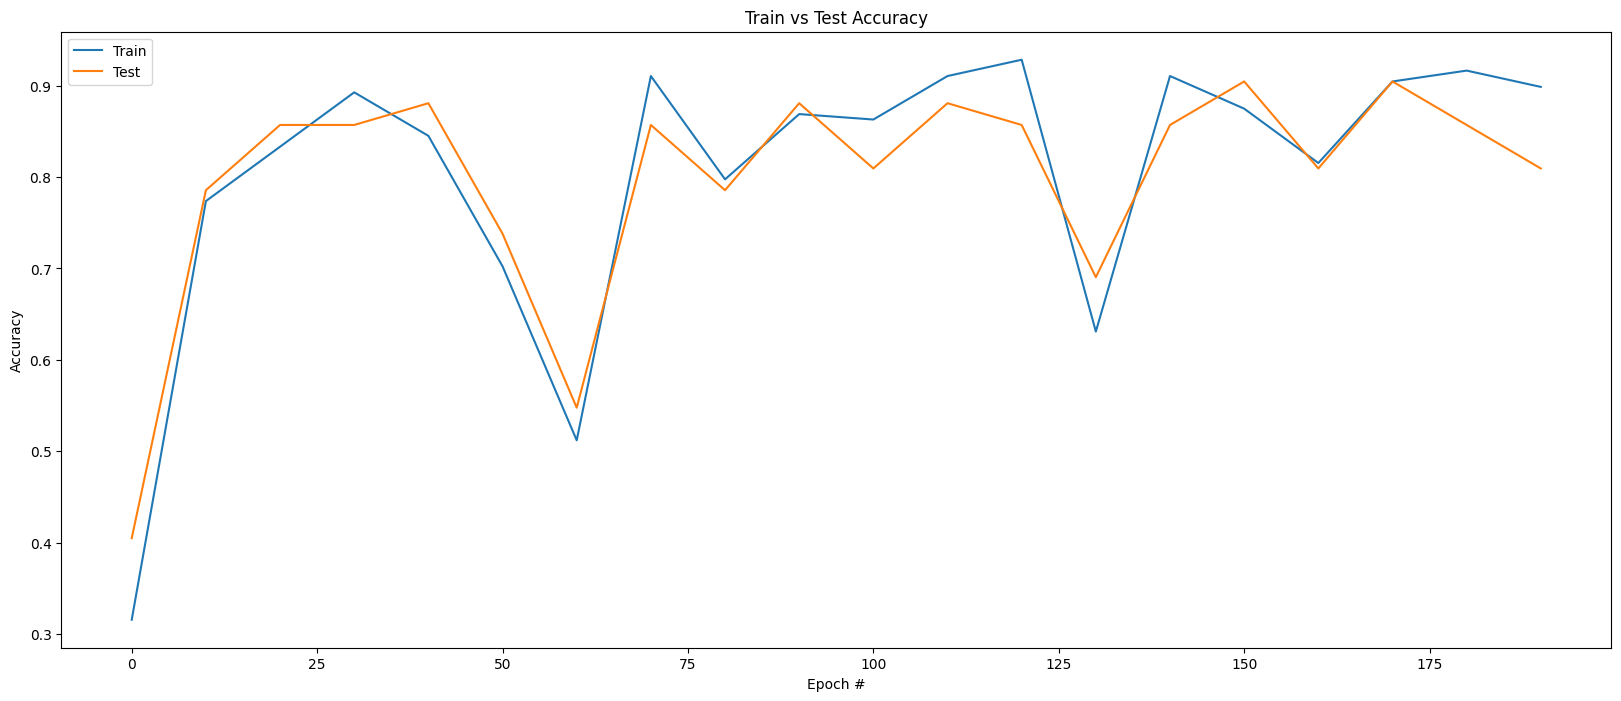

In [68]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(20,8)
plt.plot(range(0, 200, 10), train_acc)
plt.plot(range(0, 200, 10),test_acc)
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.title('Train vs Test Accuracy')
plt.show()